In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
for table_name in Base.classes.keys():
    table = getattr(Base.classes, table_name)

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
hawaii_measurements = Base.classes.measurement
hawaii_stations = Base.classes.station


In [22]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(hawaii_measurements.date)).scalar()
most_recent_date


'2017-08-23'

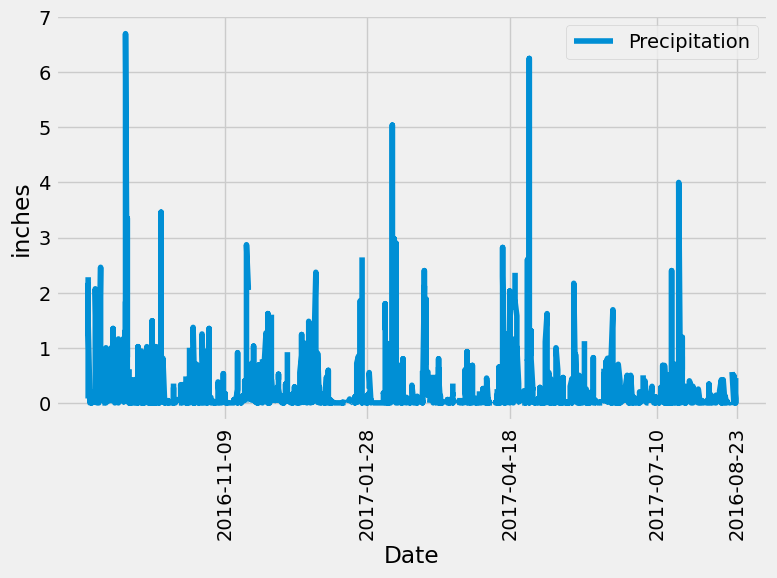

In [36]:
from datetime import datetime, timedelta
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(func.max(hawaii_measurements.date)).scalar()
# Calculate the date one year from the last date in data set.
one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(hawaii_measurements.date, hawaii_measurements.prcp) \
    .filter(hawaii_measurements.date >= one_year_ago) \
    .order_by(hawaii_measurements.date) \
    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df = df.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Precipitation'], label='Precipitation')
plt.xlabel('Date')
plt.ylabel('inches')
plt.xticks(rotation=90)


# Set specific dates as x-axis ticks
specific_dates = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']
specific_dates.sort()  
plt.xticks(specific_dates)

# Add legend for precipitation
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
summary_stats = df['Precipitation'].describe()
summary_stats


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
query = "SELECT COUNT(DISTINCT station) AS total_stations FROM station;"


result = pd.read_sql(query, engine)
result 

# Display the result


,total_stations
0,9


In [60]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

active_stations = session.query(hawaii_measurements.station, func.count(hawaii_measurements.station).label('station_count')) \
                    .group_by(hawaii_measurements.station) \
                    .order_by(func.count(hawaii_measurements.station).desc()).all()

# List the stations and their counts in descending order.
for station in active_stations:
    print(station.station, station.station_count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [69]:
most_active= active_stations[0][0]
most_active

'USC00519281'

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures= session.query(func.min(hawaii_measurements.tobs), func.max(hawaii_measurements.tobs), func.avg(hawaii_measurements.tobs)).filter(hawaii_measurements.station== most_active).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

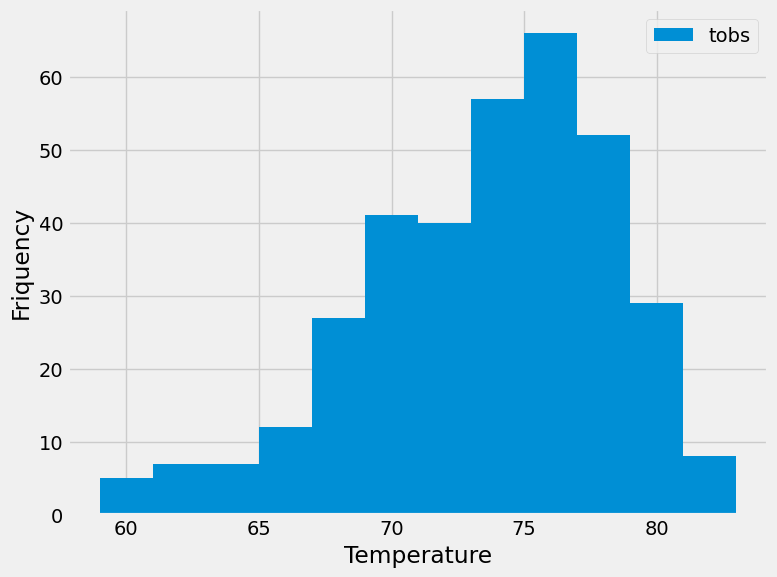

In [83]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_observation= session.query(hawaii_measurements.tobs).filter(hawaii_measurements.date >= one_year_ago).\
    filter(hawaii_measurements.station== most_active).all()
temperature = pd.DataFrame(temperature_observation)
temperature
plt.figure(figsize=(8, 6))
plt.hist(temperature['tobs'], bins=12, label='tobs')
plt.ylabel('Friquency')
plt.xlabel('Temperature')
# Add legend for precipitation
plt.legend()

plt.tight_layout()

# Close Session

In [84]:
# Close Session
session.close()